In [1]:
from PINN.PhysicsInformedROPDF import *
# Testing
import matplotlib.pyplot as plt
import torch
import numpy as np
import scipy

# set random seeds
np.random.seed(10)
torch.manual_seed(10);

In [2]:
data_path = "../data/LinearOscillator/OU_Noise_Energy_PINN_Data.mat"
# create PINN
pinn = PhysicsInformedROPDF(indim=2, outdim=1, data_path=data_path)

In [3]:
# only physics loss is used
# testing training
train(
    pinn, pinn.optimizer, 
    None, batch_size=2000,
    epochs=30, mode="physics_only", batch_print=10
)

------------------------------------------------------------------

|                      Epoch 1                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 11 |

| => | Batch 21 |

| => | Batch 31 |

| => | Batch 41 |

------------------------------------------------------------------

|        Epoch 1, Batch Average Loss = 1.9795115472566978e-07                       |

------------------------------------------------------------------

                     P Loss             = 1.9795115472566978e-07
                     D Loss             = 0.0
------------------------------------------------------------------

|                      Epoch 2                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 11 |

| => | Batch 21 |

| => | Batch 31 |

| => | Batch 41 |

------------------------------------------------------------------

|   

| => | Batch 11 |

| => | Batch 21 |

| => | Batch 31 |

| => | Batch 41 |

------------------------------------------------------------------

|        Epoch 14, Batch Average Loss = 2.2214981064669085e-10                       |

------------------------------------------------------------------

                     P Loss             = 2.2214981064669085e-10
                     D Loss             = 0.0
------------------------------------------------------------------

|                      Epoch 15                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 11 |

| => | Batch 21 |

| => | Batch 31 |

| => | Batch 41 |

------------------------------------------------------------------

|        Epoch 15, Batch Average Loss = 2.0781634476733538e-10                       |

------------------------------------------------------------------

                     P Loss             = 2.0781634476733538e-10
  

| => | Batch 11 |

| => | Batch 21 |

| => | Batch 31 |

| => | Batch 41 |

------------------------------------------------------------------

|        Epoch 27, Batch Average Loss = 1.8887776592777184e-10                       |

------------------------------------------------------------------

                     P Loss             = 1.8887776592777184e-10
                     D Loss             = 0.0
------------------------------------------------------------------

|                      Epoch 28                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 11 |

| => | Batch 21 |

| => | Batch 31 |

| => | Batch 41 |

------------------------------------------------------------------

|        Epoch 28, Batch Average Loss = 1.8535048754708745e-10                       |

------------------------------------------------------------------

                     P Loss             = 1.8535048754708745e-10
  

In [4]:
D_pred = pinn.D_nn(pinn.inputs).reshape(pinn.nx, pinn.nt).T.detach().numpy()
G_pred = pinn.G_nn(pinn.inputs).reshape(pinn.nx, pinn.nt).T.detach().numpy()
p_pred = pinn(pinn.inputs).reshape(pinn.nx, pinn.nt).T.detach().numpy()

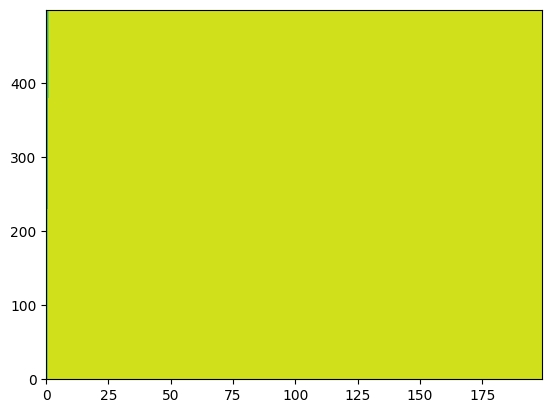

In [5]:
plt.contourf(D_pred)

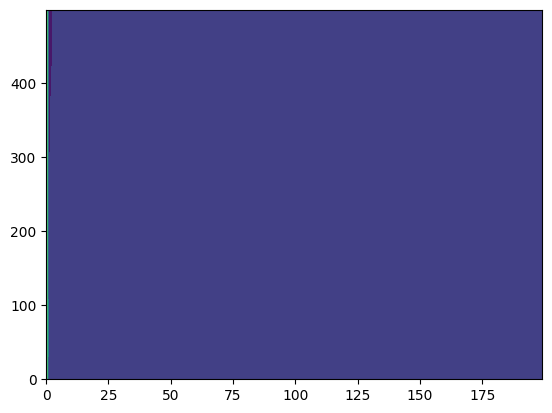

In [6]:
plt.contourf(G_pred)

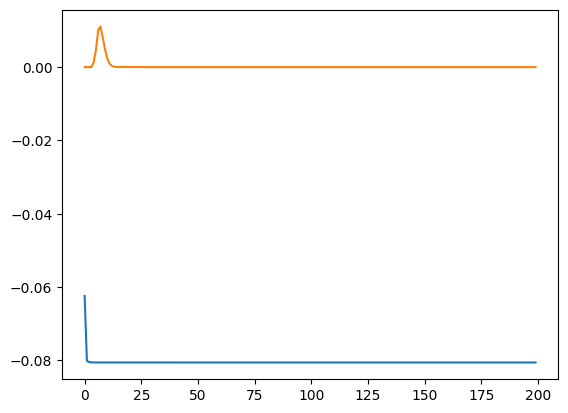

In [7]:
idx = 10
p_exact = pinn.pmc.reshape(pinn.nx, pinn.nt).T

plt.plot(p_pred[idx, :])
plt.plot(p_exact[idx, :])